In [2]:
import coba as cb
import pandas as pd
import numpy as np

# Offline Learning

## Baseline

In [292]:
res = cb.Result.from_file("../logs/2/offnp-baseline.log.gz")
res.interactions.to_pandas().loc[0,['[0]-auc0','[0]-bal0','[1]-auc0','[1]-bal0','[0]-f110','[1]-f110']] #type: ignore

[0]-auc0        0.5
[0]-bal0    0.51341
[1]-auc0        0.5
[1]-bal0    0.47451
[0]-f110    0.35574
[1]-f110    0.84952
Name: 0, dtype: object

## Features

In [12]:
res = cb.Result.from_file("../logs/2/offnp-feats.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df['[0,1]-auc-h'] =2/(1/df["[0,1]-auc0"]+1/df["[0,1]-auc1"])

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")
df = df[df["v"]==2]

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])#[[0,9,3,7,6,5,4,2,1]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist() )

n=4
format_and_print(n,df,"[0]-auc0","g[0]-auc0","g[1]-auc0")
print()
format_and_print(n,df,"[1]-auc0","g[0]-auc0","g[1]-auc0")
print()
format_and_print(n,df,"[0,1]-auc-h","g[0,1]-auc0","g[0,1]-auc1")

[0]-auc0
0.565 [0.4, 0.57, 0.75] [0.3, 0.55, 0.85] ['True', '0', '300', '300', '0', '300', '300', '300', '0', 'False', 'True', 'del']
0.56 [0.37, 0.56, 0.75] [0.28, 0.55, 0.76] ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'True', 'del']
0.559 [0.4, 0.56, 0.73] [0.3, 0.55, 0.82] ['True', '0', '0', '300', '0', '300', '300', '300', '0', 'False', 'True', 'del']
0.557 [0.4, 0.56, 0.69] [0.25, 0.54, 0.89] ['True', '0', '0', '300', '300', '300', '0', '300', '0', 'True', 'True', 'del']

[1]-auc0
0.603 [0.4, 0.54, 0.72] [0.31, 0.57, 0.88] ['True', '0', '0', '0', '0', '300', '300', '300', '0', 'False', 'True', 'del']
0.602 [0.37, 0.54, 0.7] [0.33, 0.58, 0.93] ['True', '0', '0', '300', '300', '300', '0', '0', '0', 'True', 'True', 'del']
0.595 [0.34, 0.53, 0.69] [0.42, 0.56, 0.87] ['True', '300', '0', '300', '300', '300', '0', '0', '0', 'False', 'True', 'del']
0.595 [0.34, 0.53, 0.71] [0.32, 0.61, 0.92] ['True', '0', '300', '0', '0', '0', '300', '300', '0', 'False', 'True', 'd

In [11]:
res = cb.Result.from_file("../logs/2/offnp-feats.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df['[0,1]-f11-h'] =2/(1/df["[0,1]-f110"]+1/df["[0,1]-f111"])

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")
df = df[df["v"]==2]

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])#[[0,9,3,7,6,5,4,2,1]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), round(np.nanmean(_x[interest]),5), get_pct(_x[response]), round(np.nanmean(_x[response]),5), _x["trn"].tolist() )
#acc gps ped batt acc ped hr
n=4
format_and_print(n,df,"[0]-auc0","g[0]-f110","g[1]-f110")
print()
format_and_print(n,df,"[1]-auc0","g[0]-f110","g[1]-f110")
print()
format_and_print(n,df,"[0,1]-f11-h","g[0,1]-f110","g[0,1]-f111")

[0]-auc0
0.565 [0.0, 0.0, 0.21] 0.05136 [0.78, 0.95, 0.98] 0.90053 ['True', '0', '300', '300', '0', '300', '300', '300', '0', 'False', 'True', 'del']
0.56 [0.0, 0.0, 0.21] 0.05923 [0.78, 0.95, 0.98] 0.90066 ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'True', 'del']
0.559 [0.0, 0.0, 0.24] 0.06155 [0.78, 0.95, 0.98] 0.90066 ['True', '0', '0', '300', '0', '300', '300', '300', '0', 'False', 'True', 'del']
0.557 [0.0, 0.0, 0.5] 0.1431 [0.69, 0.94, 0.98] 0.86971 ['True', '0', '0', '300', '300', '300', '0', '300', '0', 'True', 'True', 'del']

[1]-auc0
0.603 [0.0, 0.0, 0.11] 0.02675 [0.78, 0.95, 0.98] 0.90066 ['True', '0', '0', '0', '0', '300', '300', '300', '0', 'False', 'True', 'del']
0.602 [0.0, 0.0, 0.42] 0.11408 [0.7, 0.95, 0.98] 0.87381 ['True', '0', '0', '300', '300', '300', '0', '0', '0', 'True', 'True', 'del']
0.595 [0.0, 0.0, 0.25] 0.08005 [0.78, 0.95, 0.98] 0.90133 ['True', '300', '0', '300', '300', '300', '0', '0', '0', 'False', 'True', 'del']
0.595 [0.0, 0.0,

In [296]:
res = cb.Result.from_file("../logs/2/offnp-feats-drop1.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df['[0,1]-auc-h'] =2/(1/df["[0,1]-auc0"]+1/df["[0,1]-auc1"])

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")
df = df[df["v"]==2]

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    #out = out.sort_values(opt,ascending=False).head(n=n)
    out = out[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,8,3,7,6,5,4,2,1]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist() )

n=4
format_and_print(n,df,"[0]-auc0","g[0]-auc0",None)
print()
format_and_print(n,df,"[1]-auc0",None,"g[1]-auc0")
print()
format_and_print(n,df,"[0,1]-auc-h","g[0,1]-auc0","g[0,1]-auc1")

[0]-auc0
0.531 [0.38, 0.51, 0.7] [0.0, 0.0, 0.0] ['False', 'True', '300', '300', '300', '300', '300', '300', '300']
0.565 [0.4, 0.56, 0.73] [0.0, 0.0, 0.0] ['True', 'True', '300', '300', '300', '300', '0', '0', '0']
0.561 [0.39, 0.56, 0.72] [0.0, 0.0, 0.0] ['True', 'True', '300', '300', '300', '300', '300', '300', '0']
0.55 [0.38, 0.54, 0.7] [0.0, 0.0, 0.0] ['True', 'True', '300', '300', '300', '300', '300', '0', '300']
0.538 [0.36, 0.53, 0.71] [0.0, 0.0, 0.0] ['True', 'True', '0', '0', '0', '0', '300', '300', '300']
0.553 [0.38, 0.54, 0.71] [0.0, 0.0, 0.0] ['True', 'True', '0', '300', '300', '300', '300', '300', '300']
0.548 [0.37, 0.55, 0.7] [0.0, 0.0, 0.0] ['True', 'True', '300', '300', '300', '300', '0', '300', '300']
0.544 [0.36, 0.54, 0.71] [0.0, 0.0, 0.0] ['True', 'True', '300', '300', '300', '0', '300', '300', '300']
0.553 [0.38, 0.54, 0.73] [0.0, 0.0, 0.0] ['True', 'True', '300', '300', '0', '300', '300', '300', '300']
0.547 [0.38, 0.54, 0.71] [0.0, 0.0, 0.0] ['True', 'True', 

## Multitask

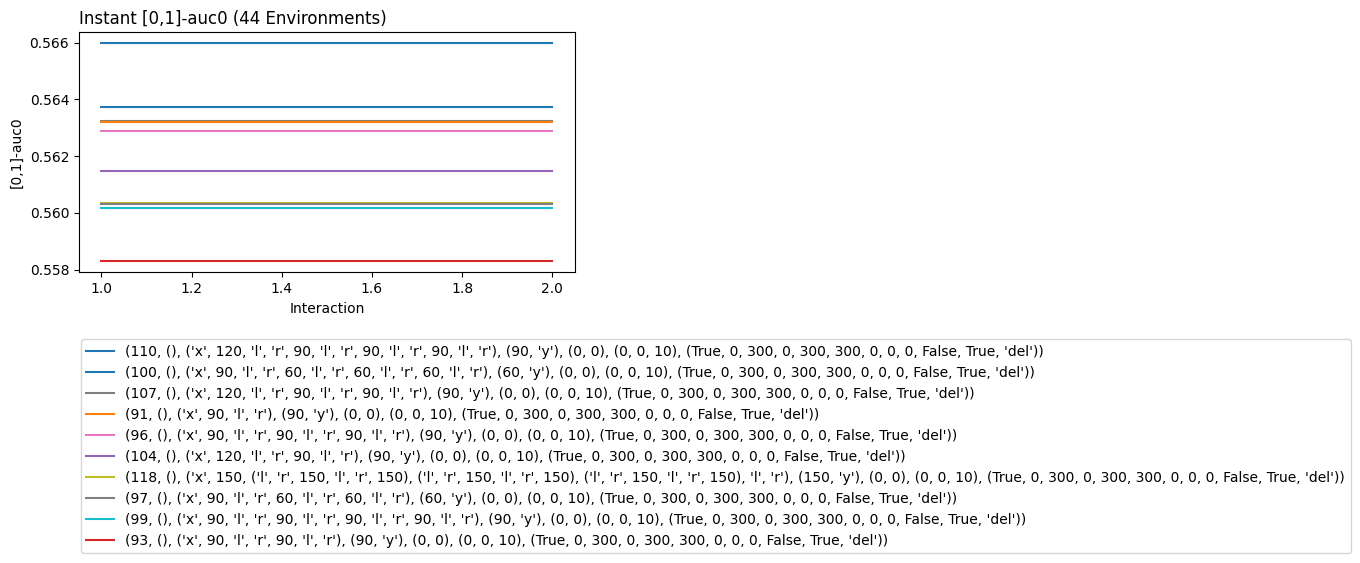

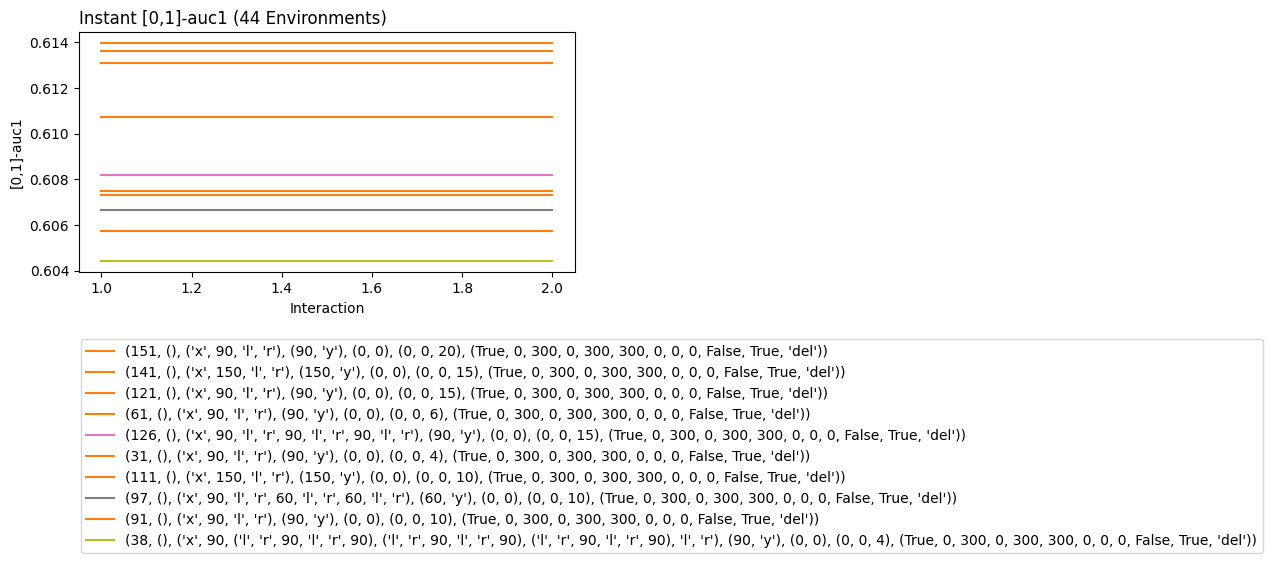

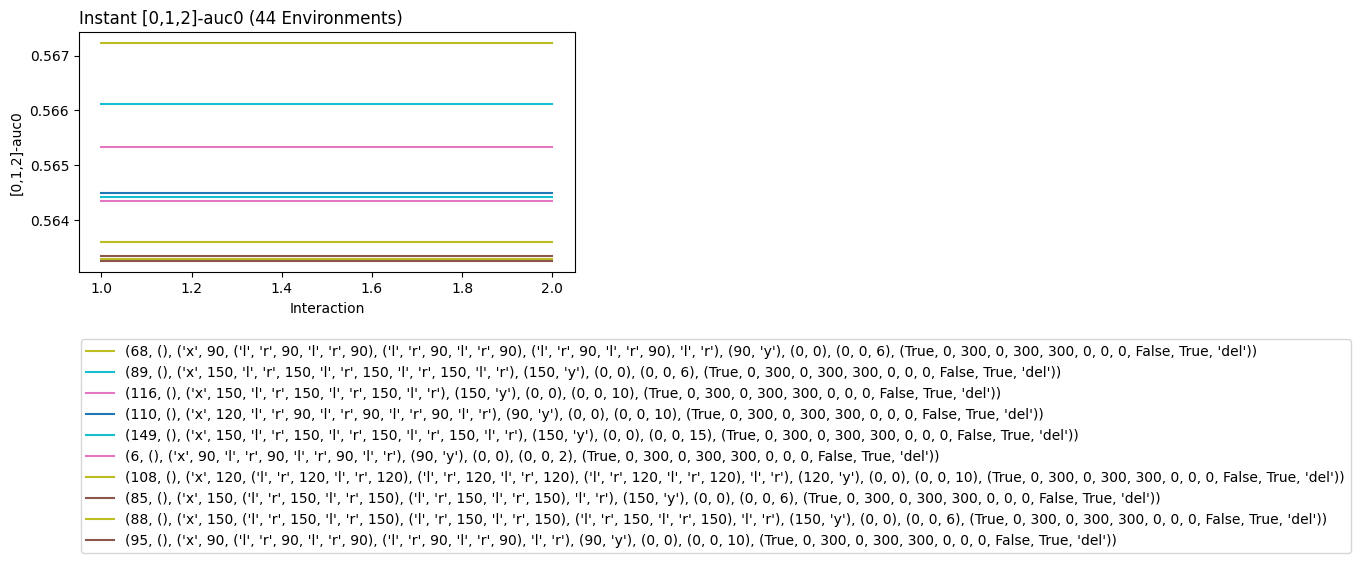

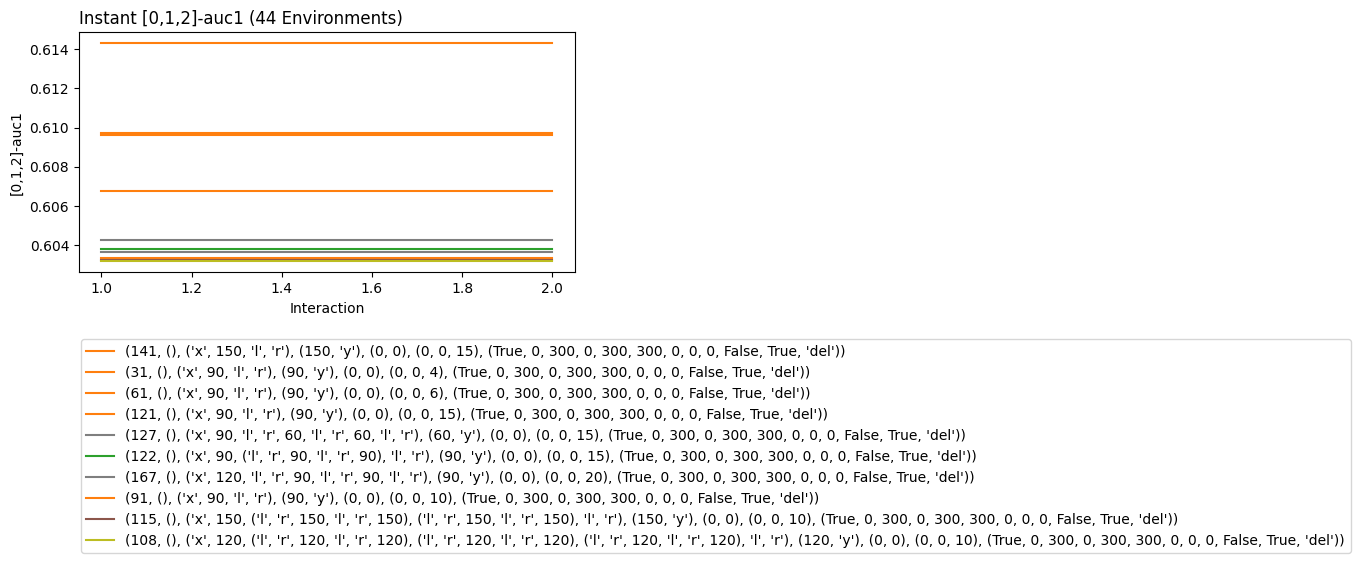

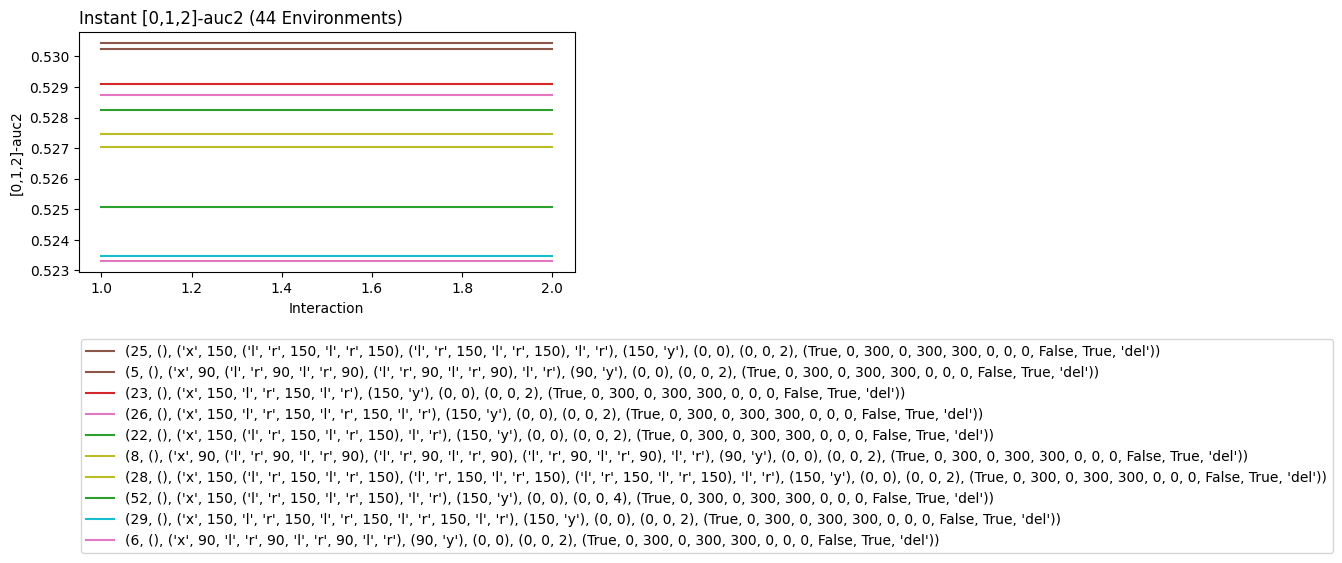

In [ ]:
l = ['evaluator_id','s1','s2','s3','dae','ws','trn']
p = ['rng','g']

res = cb.Result.from_file('../logs/2/offnp-multitask.log.gz').filter_fin(l=l,p=p) #type: ignore

res.plot_learners('index','[0,1]-auc0',l=l,p=["rng","g"],span=1,top_n=10)
res.plot_learners('index','[0,1]-auc1',l=l,p=["rng","g"],span=1,top_n=10)
res.plot_learners('index','[0,1,2]-auc0',l=l,p=["rng","g"],span=1,top_n=10)
res.plot_learners('index','[0,1,2]-auc1',l=l,p=["rng","g"],span=1,top_n=10)
res.plot_learners('index','[0,1,2]-auc2',l=l,p=["rng","g"],span=1,top_n=10)

In [11]:
res = cb.Result.from_file('../logs/2/offnp-multitask.log.gz')

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df['[0,1]-auc-h'] =2/(1/df["[0,1]-auc0"]+1/df["[0,1]-auc1"])

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")
df = df[df["v"]==2]

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    #out = out.sort_values(opt,ascending=False).head(n=n)
    out = out[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,8,3,7,6,5,4,2,1]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist() )

n=4
format_and_print(n,df,"[0,1]-auc-h","g[0,1]-auc0","g[0,1]-auc1")

[0,1]-auc-h
0.558 [0.35, 0.56, 0.73] [0.37, 0.58, 0.8] ['True', '0', '0', '0', '0', '300', '300', '300', '0']


## Missingness

In [18]:
res = cb.Result.from_file("../logs/2/offnp-ae-interest.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

def format_and_print(n,df,opt,group):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    out = df.groupby(["trn","s1","s2","dae"]).agg({opt:'mean', group: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","s2","dae",opt,group]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,8,3,7,6,5,4,2,1,9]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[group]), _x["trn"].tolist(), _x["s1"], _x["s2"], _x["dae"])

format_and_print(10,df,"[0]-auc0","g[0]-auc0")

[0]-auc0
0.571 [0.4, 0.57, 0.72] ['True', 'False', '300', '300', '300', '300', '0', '300', '0', 'True'] ('x', 26, 'l', 'r', 'x') (26, 120, 'l', 'r', 90, 'l', 'r') (11, 1)
0.568 [0.4, 0.57, 0.71] ['True', 'False', '300', '300', '300', '300', '0', '300', '0', 'True'] ('x', 0.2, 50, 'l', 'r', 'x') (50, 120, 'l', 'r', 90, 'l', 'r') (7, 1)
0.568 [0.38, 0.56, 0.73] ['True', 'False', '300', '300', '300', '300', '0', '300', '0', 'False'] ('x', 0.2, 50, 'l', 'r', 'x') (50, 120, 'l', 'r', 90, 'l', 'r') (7, 1)
0.567 [0.39, 0.55, 0.71] ['True', 'False', '300', '300', '300', '300', '0', '300', '0', 'False'] ('x', 26, 'l', 'r', 'x') (26, 120, 'l', 'r', 90, 'l', 'r') (11, 1)
0.558 [0.4, 0.56, 0.7] ['True', 'False', '300', '300', '300', '300', '0', '300', '0', 'True'] () ('x', 120, 'l', 'r', 90, 'l', 'r') (0, 0)
0.548 [0.39, 0.54, 0.71] ['True', 'False', '300', '300', '300', '300', '0', '300', '0', 'False'] () ('x', 120, 'l', 'r', 90, 'l', 'r') (0, 0)


In [ ]:
res = cb.Result.from_file("../logs/2/offnp-ae-response.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

df = df[[isinstance(e,float) for e in df["[1]-auc0"]]]

def format_and_print(n,df,opt,group):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    out = df.groupby(["trn","s1","s2","dae"]).agg({opt:'mean', group: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","s2","dae",opt,group]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,8,3,7,6,5,4,2,1,9]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[group]), _x["trn"], _x["s1"], _x["s2"], _x["dae"])

format_and_print(40,df,"[1]-auc0","g[1]-auc0")

[1]-auc0
0.604 [0.3, 0.59, 0.85] ['True' 'False' '0' '300' '300' '300' '0' '0' '0' 'False'] ('x', 0.2, 50, 'l', 'r', 'x') (50, 120, 'l', 'r', 90, 'l', 'r') (8, 1)
0.603 [0.3, 0.6, 0.84] ['True' 'False' '0' '300' '300' '300' '0' '0' '0' 'True'] ('x', 0.2, 50, 'l', 'r', 'x') (50, 120, 'l', 'r', 90, 'l', 'r') (8, 1)
0.603 [0.3, 0.6, 0.85] ['True' 'False' '0' '300' '300' '300' '0' '0' '0' 'False'] () ('x', 120, 'l', 'r', 90, 'l', 'r') (0, 0)
0.601 [0.32, 0.57, 0.83] ['True' 'False' '0' '300' '300' '300' '0' '0' '0' 'True'] () ('x', 120, 'l', 'r', 90, 'l', 'r') (0, 0)
0.595 [0.31, 0.58, 0.87] ['True' 'False' '0' '300' '300' '300' '0' '0' '0' 'True'] ('x', 20, 'l', 'r', 'x') (20, 120, 'l', 'r', 90, 'l', 'r') (5, 1)
0.589 [0.29, 0.58, 0.89] ['True' 'False' '0' '300' '300' '300' '0' '0' '0' 'False'] ('x', 20, 'l', 'r', 'x') (20, 120, 'l', 'r', 90, 'l', 'r') (5, 1)


# Online Learning

## Feats

In [8]:
import matplotlib.pyplot as plt
import coba as cb
L = ['evaluator_id','s1','s2','s3','dae','ws','pers','trn']
span = None
res = cb.Result.from_file('../logs/2/onp-feats-basis.log.gz').filter_fin(l=L,p=['l','g','rng'])

In [4]:
res.filter_fin(l=L,p=['l','g','rng'])

{'Learners': 1, 'Environments': 133120, 'Interactions': 5591040}


In [5]:
res

{'Learners': 1, 'Environments': 151552, 'Interactions': 5591040}


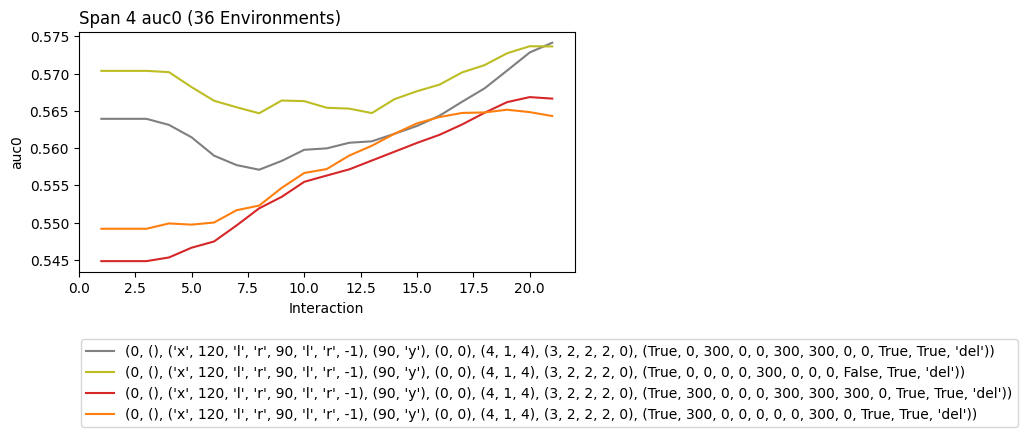

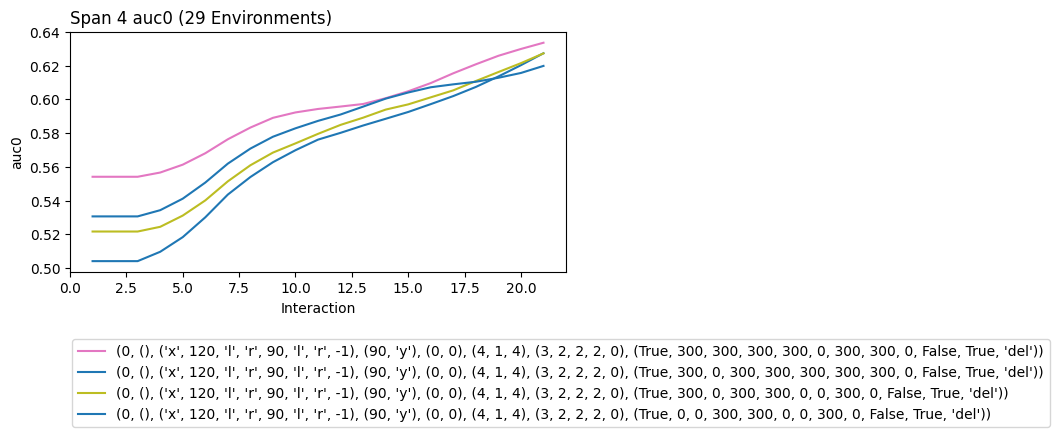

In [ ]:
# with basis learning and warm-started head
res0 = res.where(evaluator_id=0)
res0.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=span,top_n=4)
res0.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=span,top_n=4)

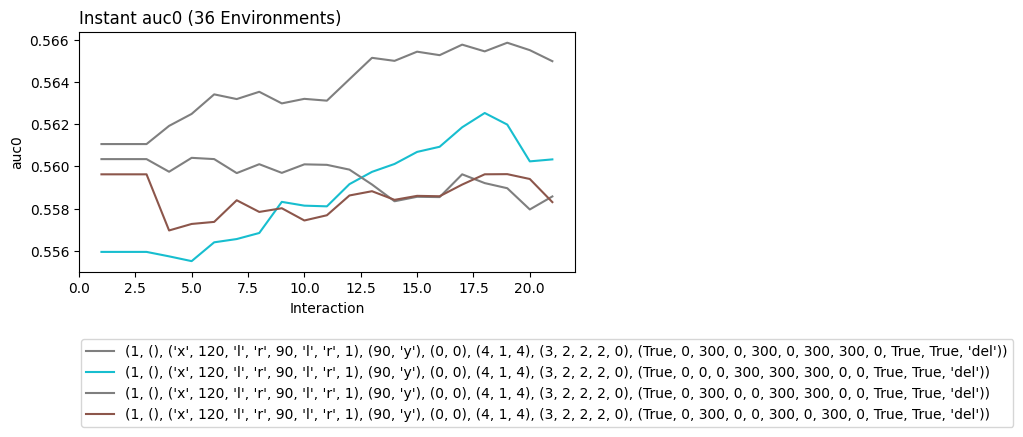

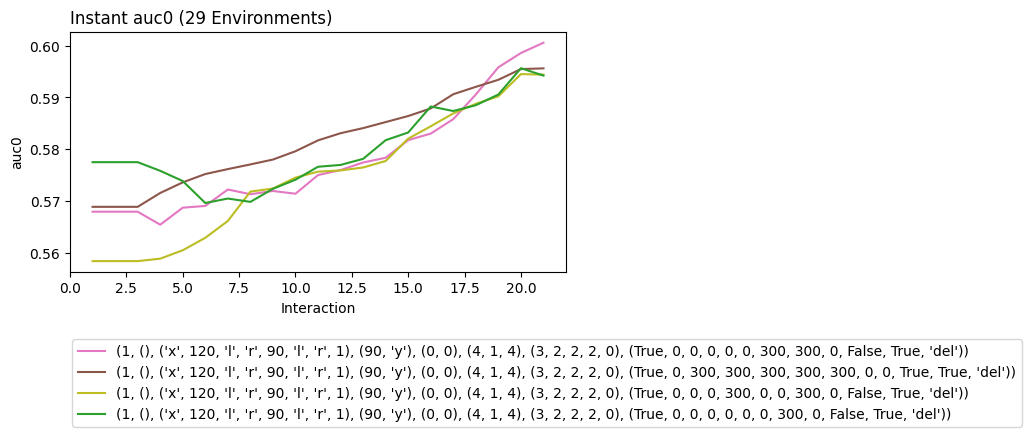

In [ ]:
# with average learning and warm-started head
res1 = res.where(evaluator_id=1)
res1.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=span,top_n=4)
res1.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=span,top_n=4)

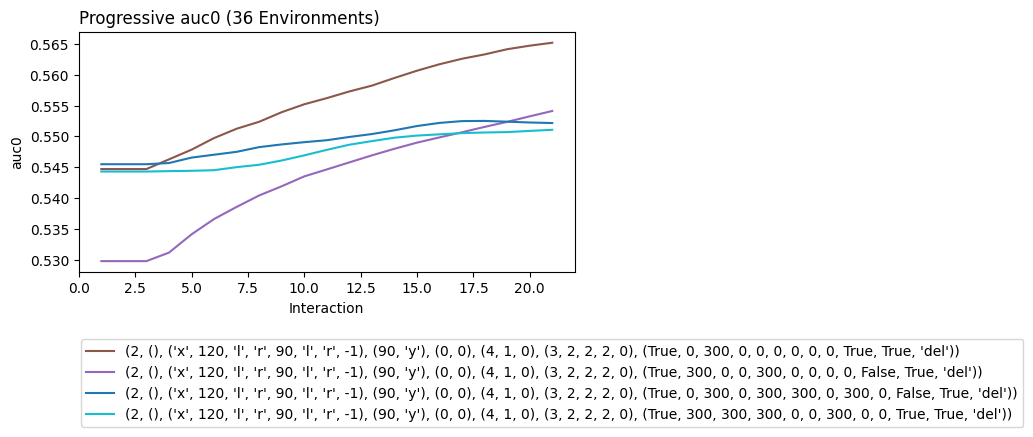

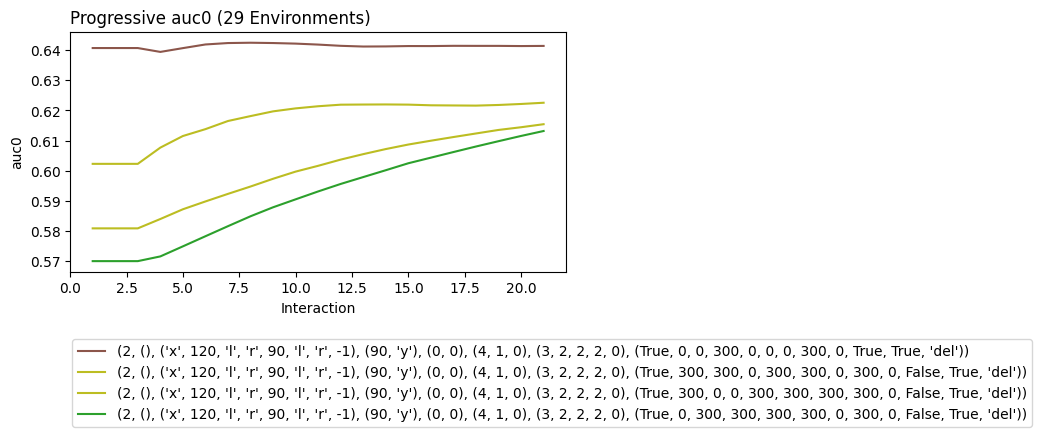

In [18]:
# with basis learning and personalized only
res2 = res.where(evaluator_id=2)
res2.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=span,top_n=4)
res2.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=span,top_n=4)

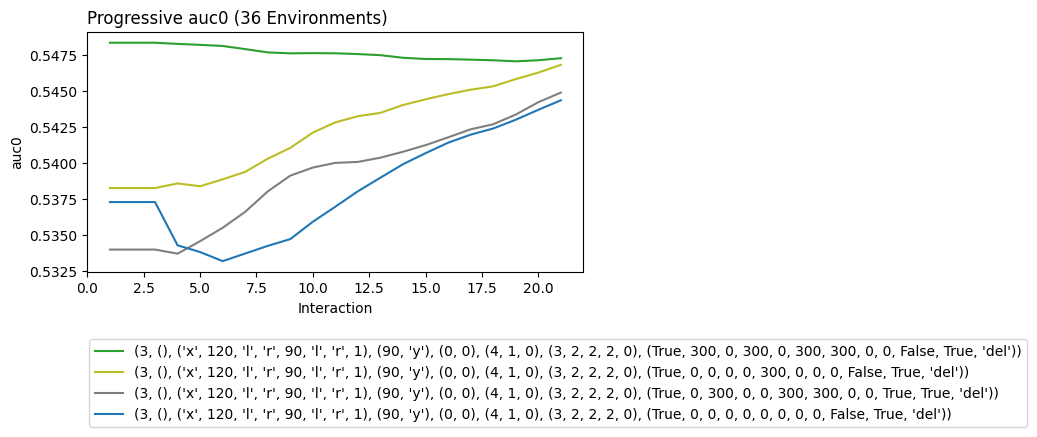

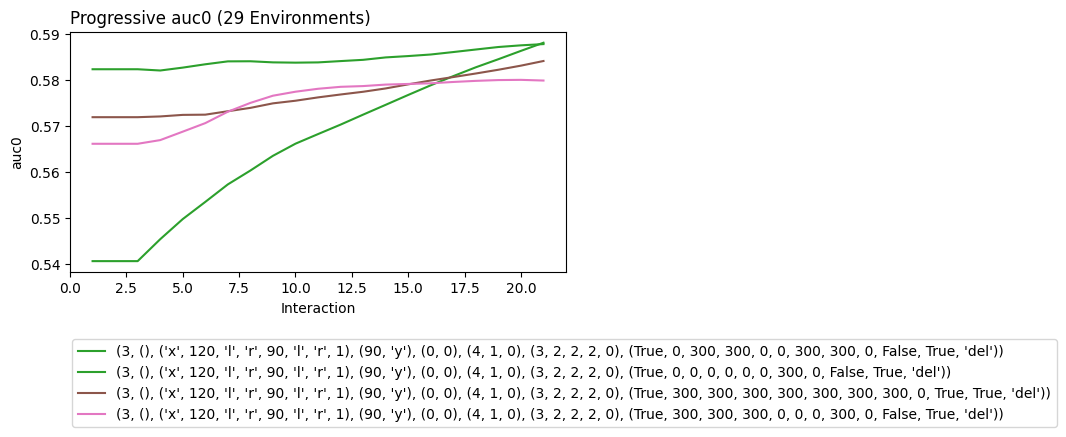

In [17]:
# with average learning and personalized only
res3 = res.where(evaluator_id=3)
res3.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=span,top_n=4)
res3.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=span,top_n=4)

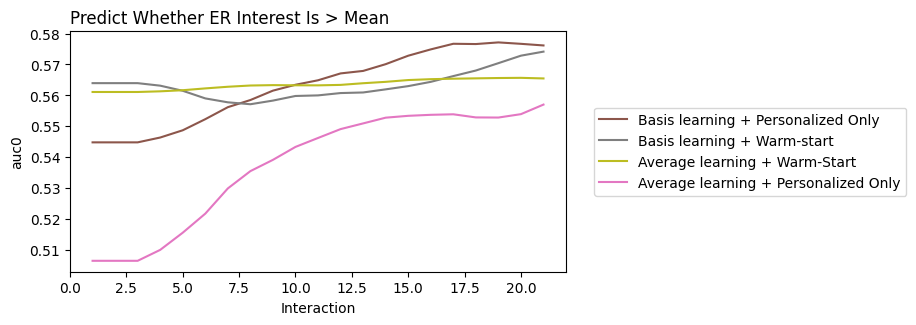

In [30]:
# # with basis learning and warm-started head
# res0 = res.where(evaluator_id=0)

# # with average learning and warm-started head
# res1 = res.where(evaluator_id=1)

# # with basis learning and personalized only
# res2 = res.where(evaluator_id=2)

# # with average learning and personalized only
# res3 = res.where(evaluator_id=3)

res2.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=4,top_n=1,out=None)
res0.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=4,top_n=1,out=None)
res1.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=4,top_n=1,out=None,colors=1)
res3.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=4,top_n=1,out=None)

plt.legend(labels=[
     'Basis learning + Personalized Only',
     'Basis learning + Warm-start',
     'Average learning + Warm-Start',
     'Average learning + Personalized Only',
#     'Personalized Only two-layer',
#     'Personalized Only linear',
 ], loc="center right", bbox_to_anchor=(1.70,.5) )

plt.title("Predict Whether ER Interest Is > Mean",loc='left')
plt.show()

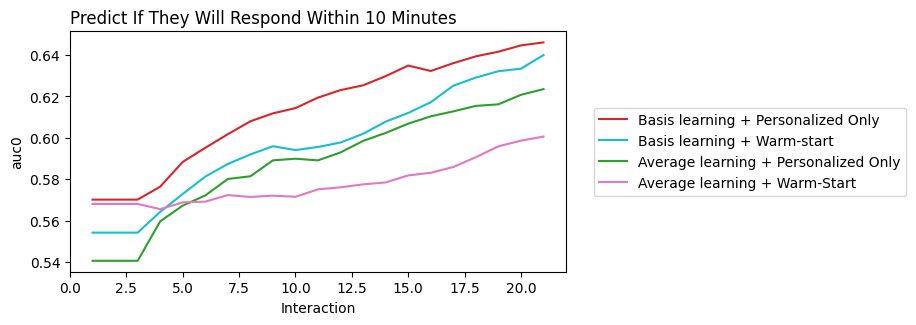

In [36]:
# # with basis learning and warm-started head
# res0 = res.where(evaluator_id=0)

# # with average learning and warm-started head
# res1 = res.where(evaluator_id=1)

# # with basis learning and personalized only
# res2 = res.where(evaluator_id=2)

# # with average learning and personalized only
# res3 = res.where(evaluator_id=3)

# # personalized only (linear)
# res4 = res.where(evaluator_id=4)

# # personalized only (two-layer)
# res5 = res.where(evaluator_id=5)

res2.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None,colors=1)
res0.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None,colors=3)
res3.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)
res1.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)

#res4.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)
#res5.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None,colors=2)

plt.legend(labels=[
    'Basis learning + Personalized Only',
    'Basis learning + Warm-start',
    'Average learning + Personalized Only',
    'Average learning + Warm-Start',
    # 'Personalized Only linear',
    # 'Personalized Only two-layer',
], loc="center right", bbox_to_anchor=(1.70,.5) )

plt.title("Predict If They Will Respond Within 10 Minutes",loc='left')
plt.show()

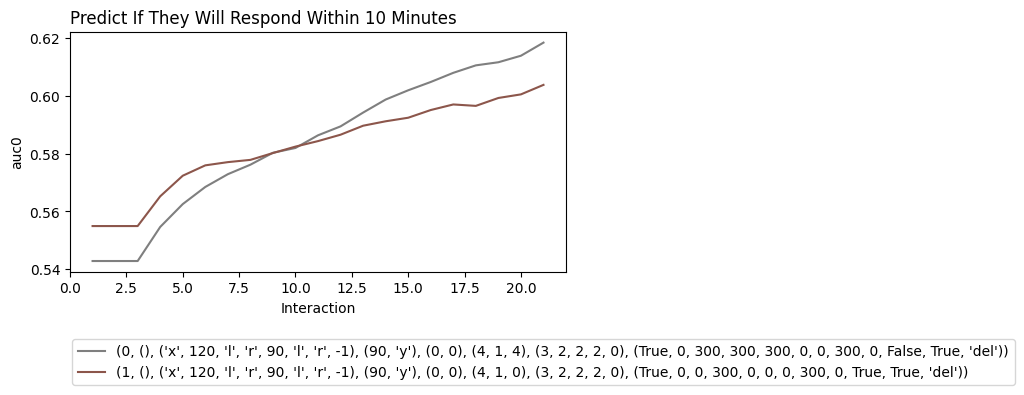

In [10]:
# # with basis learning and warm-started head
res0 = res.where(evaluator_id=0)

# # with basis learning and personalized only
res1 = res.where(evaluator_id=1)

res0.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None,colors=3)
res1.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)

# plt.legend(labels=[
#     'Basis learning + Warm-start',
#     'Basis learning + Personalized Only',
#     # 'Personalized Only linear',
#     # 'Personalized Only two-layer',
# ], loc="center right", bbox_to_anchor=(1.70,.5) )

plt.title("Predict If They Will Respond Within 10 Minutes",loc='left')
plt.show()

In [7]:
def format_and_print(n,res):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    df  = res.interactions.to_pandas()
    env = res.environments.to_pandas()
    val = res.evaluators.to_pandas()

    df = df[df["index"]==21]
    df = pd.merge(df,env,on="environment_id")
    df = pd.merge(df,val,on="evaluator_id")

    df["gauc0"] = [[a] for a in df["auc0"] ]

    out = df.groupby(["trn","s1","v"]).agg({"auc0":'mean', "gauc0":'sum'}).reset_index()
    out = out.sort_values("auc0",ascending=False).head(n=n)[["trn","s1","v","auc0","gauc0"]]
    out = [r[1] for r in out.iterrows()]
    
    for o in out: o["trn"] = np.array(o["trn"])#[[0,9,3,7,6,5,4,2,1,10]]
    for _x in out: print(round(_x["auc0"],3), get_pct(_x["gauc0"]),  _x["trn"].tolist())

    return df

model_names = [
    "basis + warm-start",
#    "average + warm-start",
    "basis + cold-start",
#    "average + cold-start",
#    "cold-start (linear)",
#    "cold-start (2-layer)",
#    "warm-start (linear)",
#    "warm-start (2-layer)"
]

n = 4

print("----Interest----")
interest = res.where(l={"=":(0,)})
for i in range(2):
    print()
    print(model_names[i])
    df = format_and_print(n,interest.where(evaluator_id=i))

print()
print("----Response----")
response = res.where(l={"=":(1,)})
for i in range(2):
    print()
    print(model_names[i])
    df = format_and_print(n,response.where(evaluator_id=i))

----Interest----

basis + warm-start
0.564 [0.44, 0.56, 0.71] ['True', '300', '300', '0', '0', '300', '0', '0', '0', 'False', 'True', 'del']
0.562 [0.43, 0.55, 0.76] ['True', '300', '300', '0', '0', '300', '300', '0', '0', 'False', 'True', 'del']
0.561 [0.44, 0.55, 0.69] ['True', '0', '0', '0', '0', '300', '0', '0', '0', 'False', 'True', 'del']
0.561 [0.44, 0.54, 0.7] ['True', '0', '300', '0', '0', '300', '300', '0', '0', 'True', 'True', 'del']

basis + cold-start
0.562 [0.44, 0.54, 0.72] ['True', '300', '300', '0', '0', '0', '300', '0', '0', 'True', 'True', 'del']
0.559 [0.43, 0.53, 0.74] ['True', '0', '300', '0', '0', '0', '0', '0', '0', 'True', 'True', 'del']
0.559 [0.43, 0.54, 0.73] ['True', '300', '0', '0', '0', '0', '0', '0', '0', 'True', 'True', 'del']
0.557 [0.43, 0.55, 0.72] ['True', '300', '0', '0', '0', '0', '300', '0', '0', 'False', 'True', 'del']

----Response----

basis + warm-start
0.618 [0.44, 0.62, 0.82] ['True', '0', '300', '300', '300', '0', '0', '300', '0', 'False',

## Replay

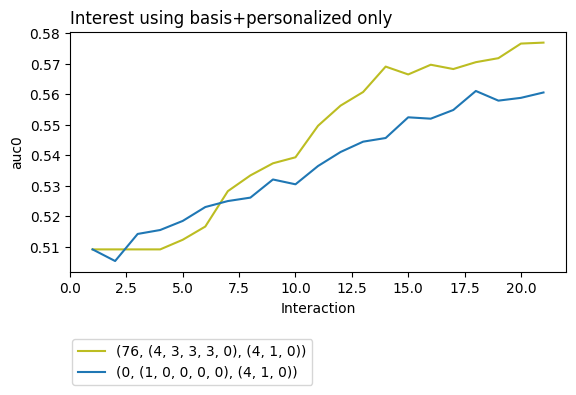

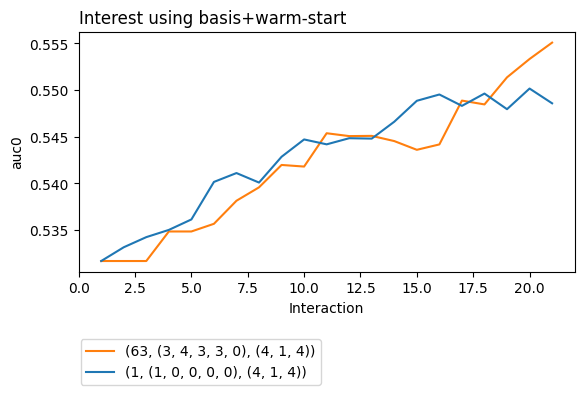

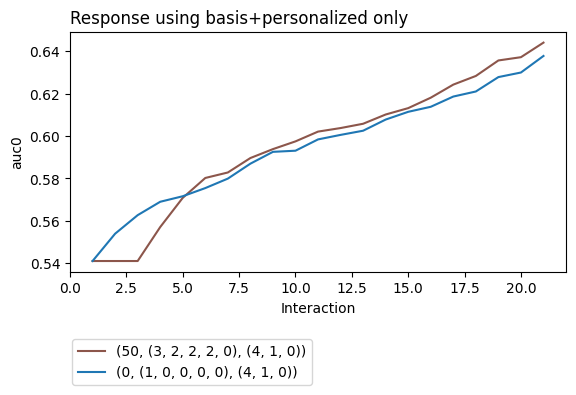

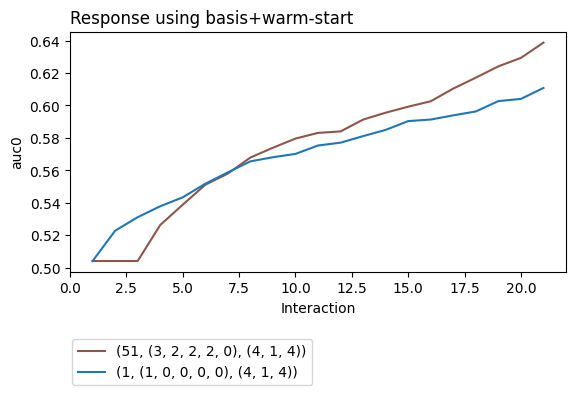

In [50]:
# warm-start + personalized (two-layer)
import matplotlib.pyplot as plt
import coba as cb

l = ['evaluator_id','pers','ws']
res = cb.Result.from_file('../logs/2/onp-replay.log.gz').filter_fin(l=l,p=['l','g','rng'])

nws = res.filter_val(lambda val: val[-1][-1]==0)
yws = res.filter_val(lambda val: val[-1][-1]!=0)

span = 1

nws.where(l={"=":(0,)}).plot_learners('index','auc0',l=l,p=['g','rng'],span=span,top_n=1,out=None)
nws.where(l={"=":(0,)}).where(pers=[(1,0,0,0,0)]).plot_learners('index','auc0',l=l,p=['g','rng'],span=span,out=None)
plt.title('Interest using basis+personalized only', loc='left')
#plt.legend(["Experience Replay", "No Experience Replay"])
plt.show()

yws.where(l={"=":(0,)}).plot_learners('index','auc0',l=l,p=['g','rng'],span=span,top_n=1,out=None)
yws.where(l={"=":(0,)}).where(pers=[(1,0,0,0,0)]).plot_learners('index','auc0',l=l,p=['g','rng'],span=span,out=None)
plt.title('Interest using basis+warm-start', loc='left')
#plt.legend(["Experience Replay", "No Experience Replay"])
plt.show()

nws.where(l={"=":(1,)}).plot_learners('index','auc0',l=l,p=['g','rng'],span=span,top_n=1,out=None)
nws.where(l={"=":(1,)}).where(pers=[(1,0,0,0,0)]).plot_learners('index','auc0',l=l,p=['g','rng'],span=span,out=None)
plt.title('Response using basis+personalized only', loc='left')
#plt.legend(["Experience Replay", "No Experience Replay"])
plt.show()

yws.where(l={"=":(1,)}).plot_learners('index','auc0',l=l,p=['g','rng'],span=span,top_n=1,out=None)
yws.where(l={"=":(1,)}).where(pers=[(1,0,0,0,0)]).plot_learners('index','auc0',l=l,p=['g','rng'],span=span,out=None)
plt.title('Response using basis+warm-start', loc='left')
#plt.legend(["Experience Replay", "No Experience Replay"])
plt.show()


We shortened 16800 learner evaluations because they were longer than the shortest environment.


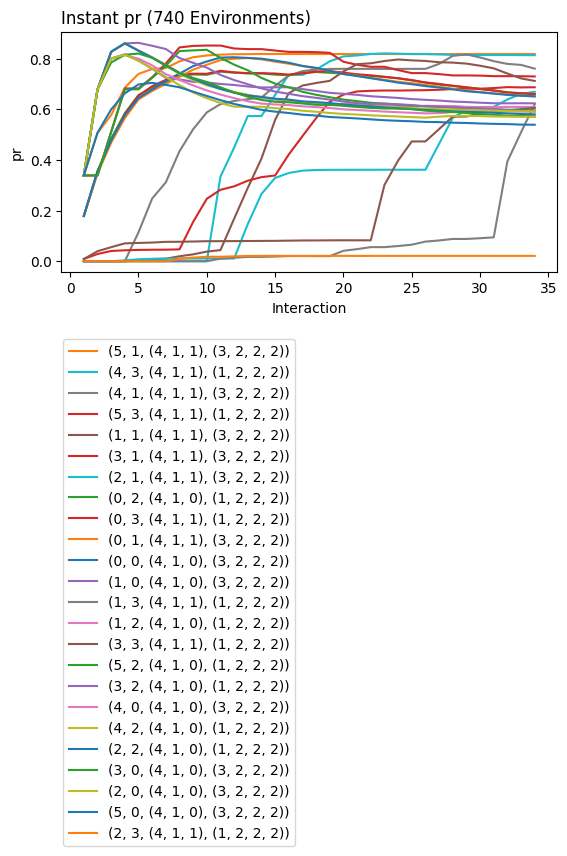

We shortened 4200 learner evaluations because they were longer than the shortest environment.


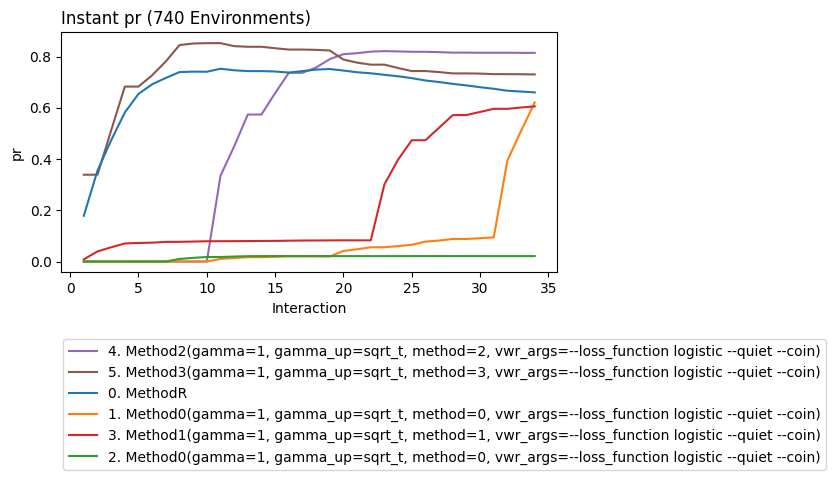

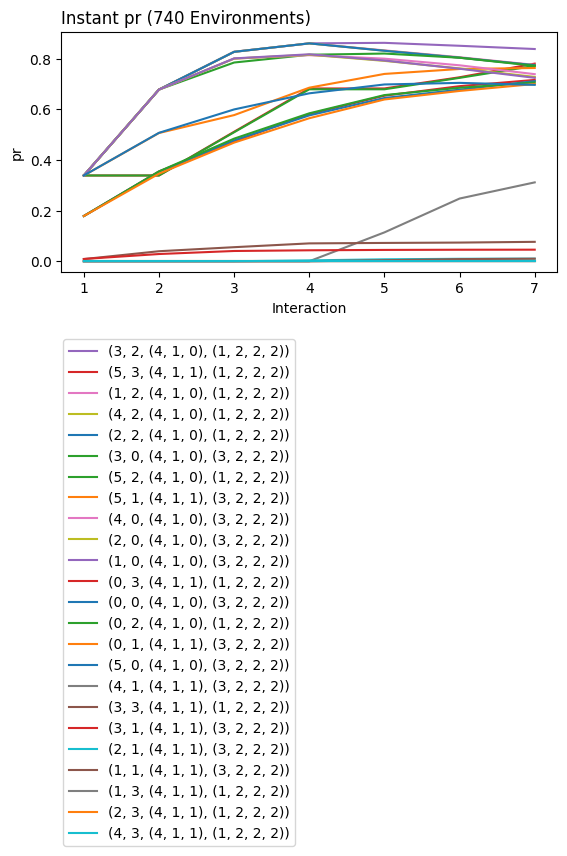

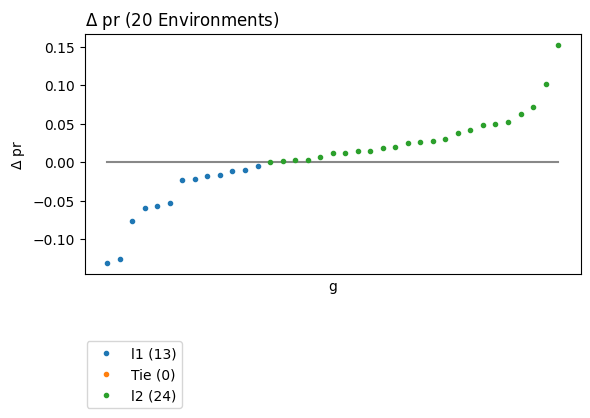

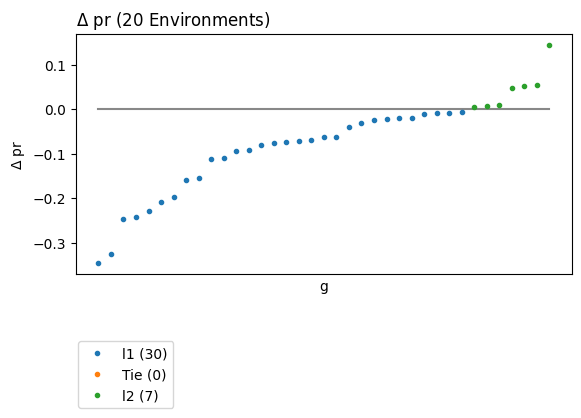

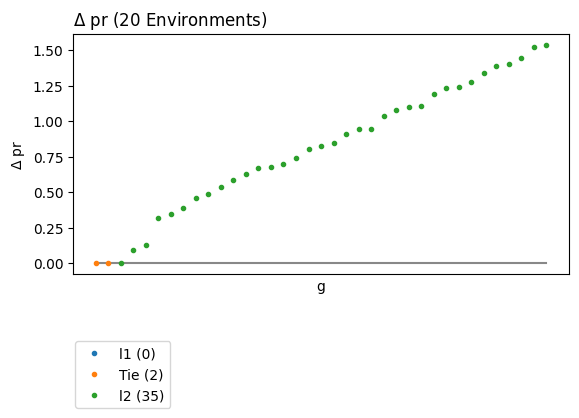

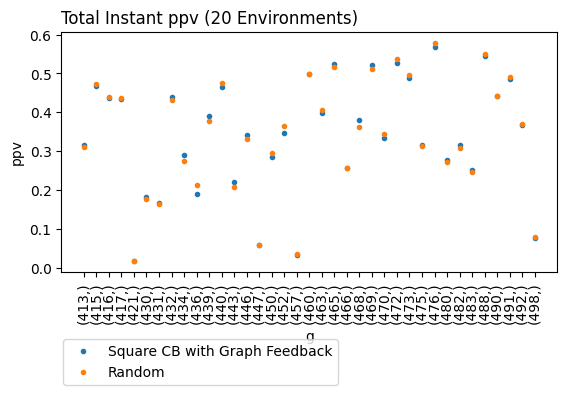

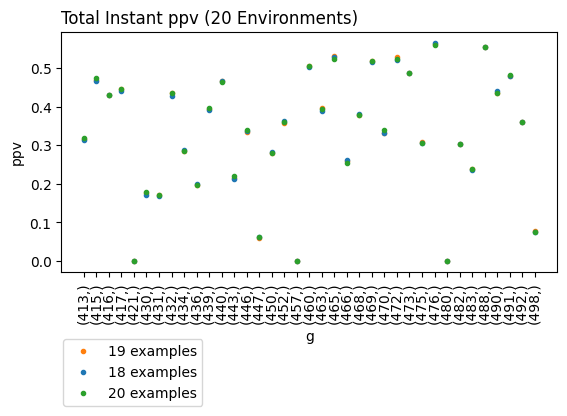

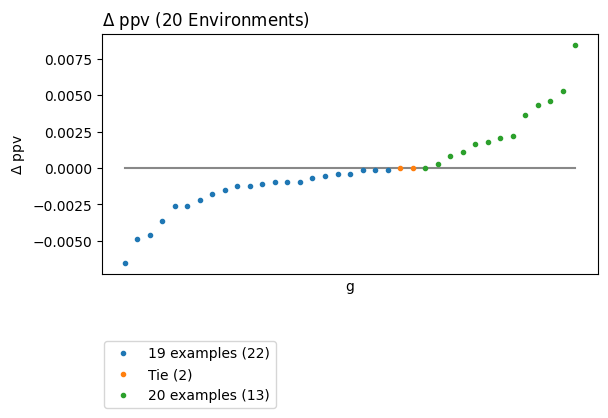

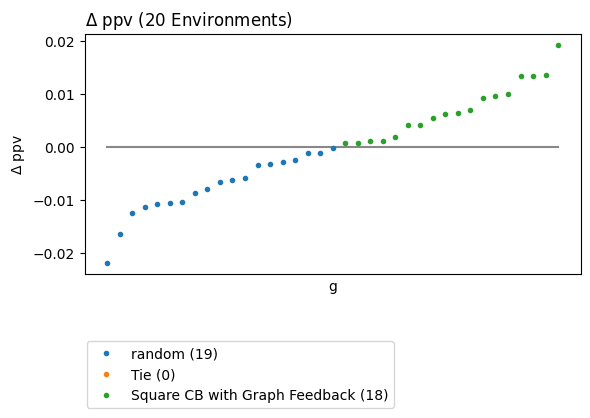

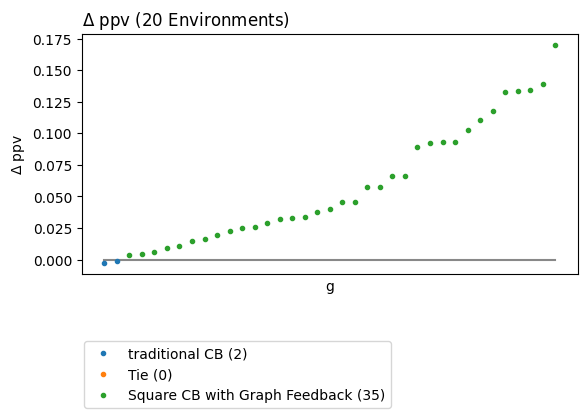

In [ ]:
import matplotlib.pyplot as plt
import coba as cb
l = ['learner_id','evaluator_id','ws','pers']
span = None
#res = cb.Result.from_file('../logs/4/test.log.gz').filter_fin(l=l,p=['g','rng'])

res.plot_learners(y='pr',l=l,span=1)
res.where(evaluator_id=3).plot_learners(y='pr',span=1)
res.where(index={"<=":7}).plot_learners(y='pr',l=l,span=1)
#res.plot_learners(x='g',y="pr",l=l,span=1,xticks=False)
res.plot_contrast((5,1),(4,3),l=['learner_id','evaluator_id'],x='g',y='pr',span=1,xticks=False)
res.plot_contrast((5,1),(3,1),l=['learner_id','evaluator_id'],x='g',y='pr',span=1,xticks=False)

res.plot_contrast((4,3,1),(4,3,20),l=['learner_id','evaluator_id','index'],x='g',y='pr',span=1,xticks=False)

y = 'pr'

res.where(learner_id=4).where(evaluator_id=3).plot_learners(y=y,x='g',l=['learner_id','evaluator_id'],span=1,labels=["Square CB with Graph Feedback"],out=None)
res.where(learner_id=0).where(evaluator_id=0).plot_learners(y=y,x='g',l=['learner_id','evaluator_id'],span=1,labels=["Random"],colors=1)
res.where(index=[18,19,20]).where(learner_id=4).where(evaluator_id=3).plot_learners(y=y,x='g',l=['learner_id','evaluator_id','index'],span=1,labels=['18 examples', '19 examples', '20 examples'])
res.plot_contrast((4,3,19),(4,3,20),l=['learner_id','evaluator_id','index'],x='g',y=y,span=1,xticks=False,labels=['19 examples', '20 examples'])
res.plot_contrast((0,0),(4,3),l=['learner_id','evaluator_id'],x='g',y=y,span=1,xticks=False,labels=["random","Square CB with Graph Feedback"])
res.plot_contrast((3,3),(4,3),l=['learner_id','evaluator_id'],x='g',y=y,span=1,xticks=False,labels=["traditional CB","Square CB with Graph Feedback"])


We removed 1 ['g'] because it did not exist for every ['gamma', 'mu', 'learner_id', 'evaluator_id'].
We shortened 11520 learner evaluations because they were longer than the shortest environment.


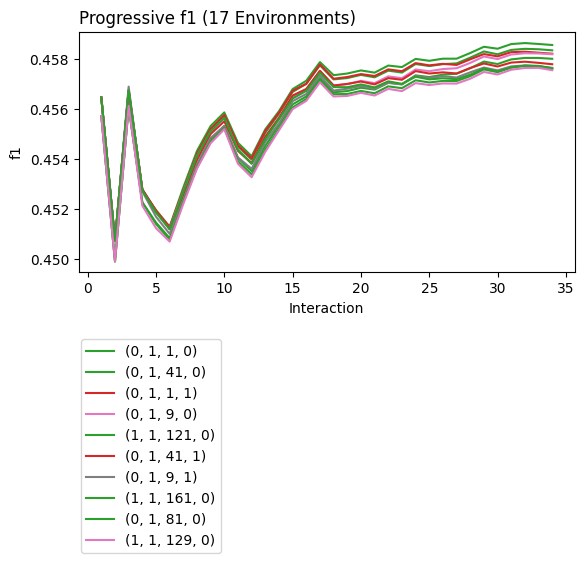

In [35]:
#res = cb.Result.from_file('../logs/4/test6.log.gz') #type: ignore
#res.plot_learners(y="f1",span=None,l=["power_t","scale_t","gamma","mu","sendr","evaluator_id"],p=["g"],top_n=10)
res.plot_learners(y="f1",span=None,l=["gamma","mu","learner_id","evaluator_id"],p=["g"],top_n=10)

In [4]:
res

{'Learners': 1, 'Environments': 32, 'Interactions': 0}
